<h1 style="font-size:300%">Spotify Song Ranking Predictor</h1>

# Project Overview
 
Martin Hristev

In this project, I'm delving into the world of music to uncover why some songs make it big while others don't quite hit the mark. While music taste can be subjective, it's worth exploring whether certain features play a crucial role in a song's success on the charts. By analyzing data from Spotify and extending it with additional features through the Spotify API, I aim to shed light on what factors contribute to a song's rank. Ultimately, I'm curious to see if AI can accurately predict whether a song will become a hit, providing valuable insights for musicians and industry professionals alike.

The project uses this [dataset](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated) retrieved on 15/04/2024. The dataset was filtered to include only the highest rank of each song on a global level. 

Additional features were added to the dataset using the Spotify API. These features include:

- `genre`: This was categorized into larger genres, based on my understanding and using Google for reference.
- `num_samples`
- `end_of_fade_in`
- `start_of_fade_out`


# Importing Necessary Libraries

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)

Pandas version: 2.2.1
Seaborn version: 0.13.2
Matplotlib version: 3.8.3


# 3. Loading and Exploring the Data

In [36]:
try:
    df = pd.read_csv('./raw_data/expanded_ds_audio_genres_15_04_2024.csv')
except Exception as e:
    print("An error occurred while reading the CSV file:", e)
    df = None 

df.shape

(356, 37)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          356 non-null    object 
 1   name                356 non-null    object 
 2   artists             356 non-null    object 
 3   daily_rank          356 non-null    int64  
 4   daily_movement      356 non-null    int64  
 5   weekly_movement     356 non-null    int64  
 6   country             0 non-null      float64
 7   snapshot_date       356 non-null    object 
 8   popularity          356 non-null    int64  
 9   is_explicit         356 non-null    bool   
 10  duration_ms         356 non-null    int64  
 11  album_name          355 non-null    object 
 12  album_release_date  355 non-null    object 
 13  danceability        356 non-null    float64
 14  energy              356 non-null    float64
 15  key                 356 non-null    int64  
 16  loudness

In [38]:
df.describe()

,daily_rank,daily_movement,weekly_movement,country,popularity,duration_ms,danceability,energy,key,loudness,...,Electronic/Dance,Rap/Hip Hop,Reggaeton/Latin,Country/Folk,R&B/Soul,Blues/Jazz,World,num_samples,end_of_fade_in,start_of_fade_out
count,356.000000,356.000000,356.000000,0.0,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,...,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,3.560000e+02,356.000000,356.000000
mean,22.334270,13.671348,20.570225,NaN,63.418539,199596.688202,0.636683,0.624582,5.061798,-6.979924,...,0.075843,0.247191,0.250000,0.028090,0.210674,0.047753,0.160112,4.400846e+06,0.443653,192.579060
std,14.160371,14.796702,14.830236,NaN,36.498298,48933.826201,0.140535,0.177502,3.618669,2.681394,...,0.265119,0.431986,0.433622,0.165462,0.408361,0.213543,0.367226,1.078797e+06,0.912016,48.217812
min,1.000000,0.000000,0.000000,NaN,0.000000,42166.000000,0.234000,0.091100,0.000000,-17.828000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.297750e+05,0.000000,42.166670
25%,10.750000,1.000000,7.000000,NaN,30.000000,169229.750000,0.534750,0.513500,2.000000,-8.279750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.731520e+06,0.000000,162.173970
50%,21.000000,7.000000,19.000000,NaN,83.000000,199035.000000,0.648500,0.645000,5.000000,-6.513500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.388728e+06,0.197120,190.519730
75%,34.000000,26.000000,34.000000,NaN,90.000000,230246.000000,0.750000,0.758250,8.000000,-5.261000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,5.076937e+06,0.290212,222.853510
max,50.000000,49.000000,49.000000,NaN,100.000000,379058.000000,0.943000,0.965000,11.000000,-1.883000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.358247e+06,6.188120,368.739530


In [39]:
df.sample(10)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,Electronic/Dance,Rap/Hip Hop,Reggaeton/Latin,Country/Folk,R&B/Soul,Blues/Jazz,World,num_samples,end_of_fade_in,start_of_fade_out
2,045ZeOHPIzhxxsm8bq5kyE,Out Of The Woods (Taylor's Version),Taylor Swift,8,42,42,NaN,2023-10-29,0,False,...,0,0,0,0,0,0,0,5199390.0,0.00000,228.86748
67,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,23,27,27,NaN,2024-02-16,93,False,...,0,0,0,0,0,0,0,4879812.0,0.20830,217.00789
118,2QN9zL3SzXdGqqmXO68gFp,Somebody's Watching Me - Single Version,Rockwell,31,19,19,NaN,2023-11-02,79,False,...,0,0,0,0,0,0,0,5265246.0,0.31927,226.88799
280,69phA1R4gmQsBFRQ3INW8C,ONE CALL,Rich Amiri,39,8,11,NaN,2024-03-08,87,True,...,0,1,0,0,0,0,0,2676848.0,0.00000,115.27546
180,3k6q0O9JnO2GhvD6C8fs20,Closer Than This,Jimin,33,17,17,NaN,2023-12-30,87,False,...,0,0,0,0,0,0,1,4923810.0,0.22485,217.30396
218,4UkUxO2WlKLc0Q1iEutGGh,CONTIGO (with Tiësto),"KAROL G, Tiësto",22,28,28,NaN,2024-02-18,73,False,...,1,0,1,0,0,0,0,4250951.0,0.00000,187.98875
252,5Jh1i0no3vJ9u4deXkb4aV,so american,Olivia Rodrigo,36,14,14,NaN,2024-03-23,46,True,...,0,0,0,0,0,0,0,3742266.0,0.22063,164.94295
49,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,2,1,5,NaN,2024-02-20,99,False,...,0,0,0,0,0,0,0,3934308.0,0.24776,174.64308
321,79AHPJd8upvNxyK2qQcY8J,HISS,Megan Thee Stallion,20,6,30,NaN,2024-02-03,84,True,...,1,1,0,0,1,0,0,4251651.0,0.15664,187.70432
256,5ONOlTiqymhzwcFjqcIT6E,Hate You,Jung Kook,16,34,34,NaN,2023-11-05,0,False,...,0,0,0,0,0,0,1,3400917.0,0.24299,146.25089


# 4. Data Cleaning and Preprocessing

To ensure the project focuses on the Global Spotify ranking, it is necessary to exclude all records associated with specific countries. Having `N/A` value in `country` column means that the ranking is `Global`.


In [40]:
df = df[df['country'].isna()]
df.shape

(356, 37)

Get only the highest rank for each song, as we want the model to predict the song's highest achievable rank.

In [41]:
df = df.loc[df.groupby("spotify_id")['daily_rank'].idxmin()]
df.shape

(356, 37)

Checking for missing values.

In [42]:
df.isna().sum()

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country               356
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name              1
album_release_date      1
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
Pop                     0
Rock                    0
Electronic/Dance        0
Rap/Hip Hop             0
Reggaeton/Latin         0
Country/Folk            0
R&B/Soul                0
Blues/Jazz              0
World                   0
num_samples             0
end_of_fade_in          0
start_of_fade_out       0
dtype: int64

Checking for white spaces that are not null in the dataset and making sure everything has a legit value

In [43]:
white_spaces = df.map(lambda x: isinstance(x, str) and x.isspace())
print(white_spaces.sum())

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
Pop                   0
Rock                  0
Electronic/Dance      0
Rap/Hip Hop           0
Reggaeton/Latin       0
Country/Folk          0
R&B/Soul              0
Blues/Jazz            0
World                 0
num_samples           0
end_of_fade_in        0
start_of_fade_out     0
dtype: int64


Check the missing values in the album section

In [44]:
df[df['album_name'].isnull()]

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,Electronic/Dance,Rap/Hip Hop,Reggaeton/Latin,Country/Folk,R&B/Soul,Blues/Jazz,World,num_samples,end_of_fade_in,start_of_fade_out
207,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999,Frank Sinatra,25,3,25,NaN,2023-12-27,88,False,...,0,0,0,0,1,1,0,2661288.0,0.36009,116.23909


The missing `album_name` and `release_date` is a case of Missing At Random (MAR) data.
We can conveniently search and retrieve the missing values from Spotify itself, ensuring that no data is lost.

In [45]:
df['album_name'] = df['album_name'].fillna('A Jolly Christmas From Frank Sinatra')
df['album_release_date'] = df['album_release_date'].fillna('1957-09-21')

Confirm that all missing values have been resolved.

In [46]:
df.isna().sum()

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country               356
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name              0
album_release_date      0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
Pop                     0
Rock                    0
Electronic/Dance        0
Rap/Hip Hop             0
Reggaeton/Latin         0
Country/Folk            0
R&B/Soul                0
Blues/Jazz              0
World                   0
num_samples             0
end_of_fade_in          0
start_of_fade_out       0
dtype: int64

Check for duplicated rows

In [47]:
df[df.duplicated()].sum()

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country               0.0
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name              0
album_release_date      0
danceability          0.0
energy                0.0
key                     0
loudness              0.0
mode                    0
speechiness           0.0
acousticness          0.0
instrumentalness      0.0
liveness              0.0
valence               0.0
tempo                 0.0
time_signature          0
Pop                     0
Rock                    0
Electronic/Dance        0
Rap/Hip Hop             0
Reggaeton/Latin         0
Country/Folk            0
R&B/Soul                0
Blues/Jazz              0
World                   0
num_samples           0.0
end_of_fade_in        0.0
start_of_fade_out     0.0
dtype: object

Replace the boolean values True and False in the 'is_explicit' column with the corresponding integer values 1 and 0.

In [48]:
df['is_explicit'] = df['is_explicit'].map({True: 1, False: 0})

Convert the dates to datetime format for easier manipulation and analysis.

In [49]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

Create a new column to represent the number of days since the song's release and include the release year information.

In [50]:
df['release_year'] = df['album_release_date'].dt.year
df['days_since_release'] = (df['snapshot_date'] - df['album_release_date']).dt.days

Convert the song duration from milliseconds to minutes.

In [51]:
df['duration_min']= round(df['duration_ms'] / (1000*60), 2)

Drop Irrelevant Columns

- `spotify_id`: The unique identifier for the song in the Spotify database. (type: str)
- `name`: The title of the song. (type: str)
- `artists`: The name(s) of the artist(s) associated with the song. Do `split(', ')` to convert to a list (type: str)
- `daily_movement`: The change in rankings compared to the previous day. (type: int)
- `weekly_movement`: The change in rankings compared to the previous week. (type: int)
- `country`: The ISO code of the country of the Top 50 Playlist. If Null, then the playlist if 'Global Top 50'. (type: str)
- `snapshot_date`: The date on which the data was collected from the Spotify API. (type: str)
- `popularity`: A measure of the song's current popularity on Spotify. (type: int)
- `duration_ms`: The duration of the song in milliseconds. (type: int)
- `album_name`: The title of the album the song belongs to. (type: str)
- `album_release_date`: The release date of the album the song belongs to. (type: str)


We have chosen to drop certain columns to align with the primary objective of our project, which is to predict the ranking of an unreleased song by any artist. Columns such as `daily_movement`, `weekly_movement`, names, and `popularity` are not relevant in this context. This is because these features rely on data that would not be available for an unreleased song. By focusing on intrinsic song features, we aim to build a model that can make accurate predictions regardless of the artist or the song's current popularity.

In [52]:
df.drop(labels=["spotify_id", 
                "artists", 
                "name", 
                "country", 
                "daily_movement",
                "weekly_movement",
                "album_name",
                "duration_ms",
                "album_release_date",
                "snapshot_date",
                "popularity",
                ], axis=1, inplace=True)


To provide a clear and accurate representation of the data, we have renamed the column `daily rank` to `highest rank`. This renaming is necessary because we have filtered the dataset to include only the highest rank for each song.

In [53]:
df.rename(columns={'daily_rank': 'highest_rank'}, inplace=True)

# 5. Feature Selection

To analyze the correlations between the features and the `highest_rank` column, we generate a heatmap. However, since we have a large number of columns in our dataset, the heatmap is split into two parts to make it more clear and easier to interpret.

By splitting the heatmap into two sections, we can focus on the correlations between the `highest_rank` and the features in a more organized and systematic way. This allows us to identify any significant relationships between the variables and gain insights into which features may have a stronger impact on the `highest_rank`.

The first part of the heatmap displays the correlations between the `highest_rank` and the first set of features. This section helps us understand the initial relationships between these features and the target variable. We can observe the strength and direction of the correlations, which can guide us in further analysis and model building.


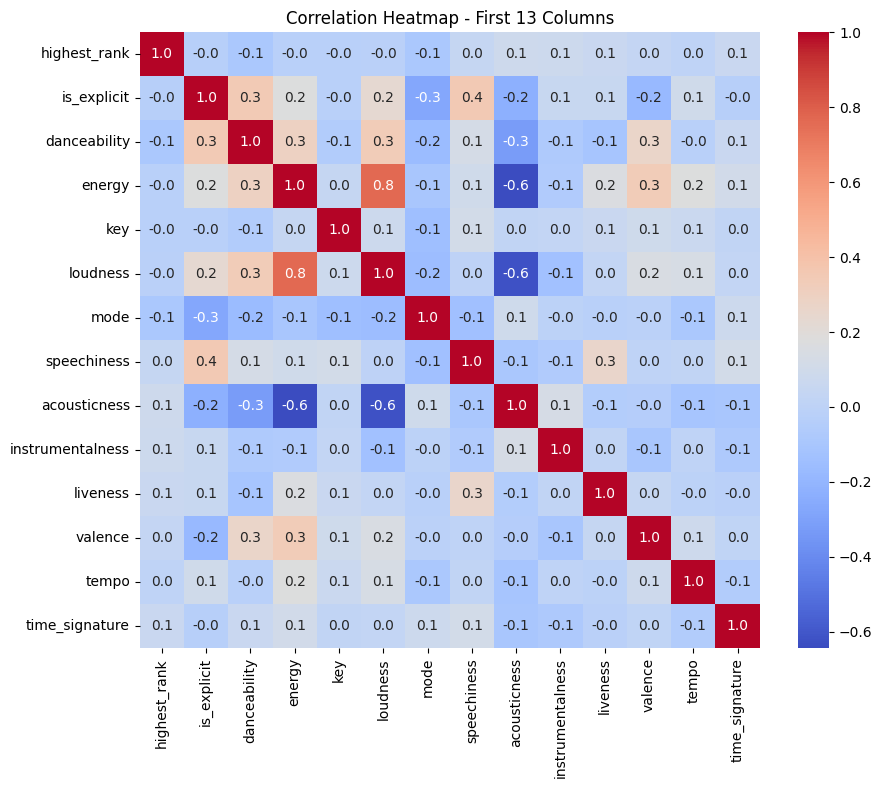

In [54]:
correlations = df.corr()

selected_columns_1 = ['highest_rank'] + list(df.columns[1:14])
correlations_1 = correlations.loc[selected_columns_1, selected_columns_1]

plt.figure(figsize=(10, 8))
sns.heatmap(correlations_1, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap - First 13 Columns')
plt.show()

After generating the heatmap and examining the correlations, we observed that the correlations for the song genres in the dataset are close to zero. This indicates that these features have very little linear relationship with the target variable.

The second part of the heatmap shows the correlations between the `highest_rank` and the remaining features.

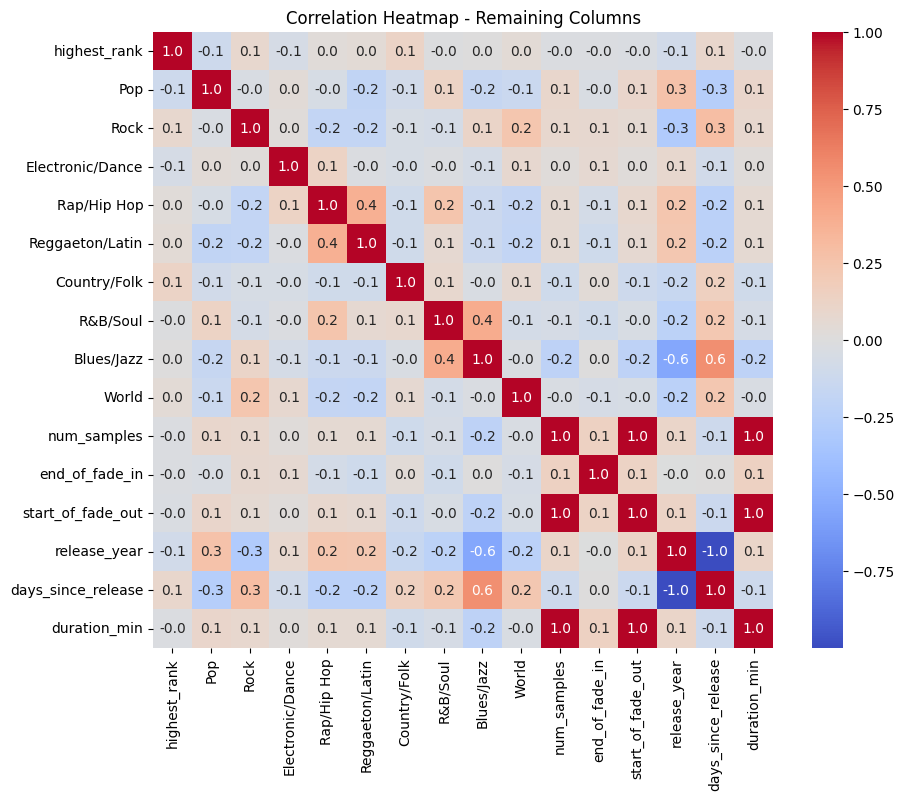

In [55]:
selected_columns_2 = ['highest_rank'] + list(df.columns[14:])
correlations_2 = correlations.loc[selected_columns_2, selected_columns_2]

plt.figure(figsize=(10, 8))
sns.heatmap(correlations_2, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap - Remaining Columns')
plt.show()

Among the genres, `Pop`, `Rock`, `Electronic/Dance`, and `Country/Folk` emerged as the most listened to by the audience. However, their correlations with the target variable are around 0.1, a value that is too close to zero to be considered significant. 

While these genres may be popular among listeners, their low correlation values suggest that they may not be relevant features for the predictive model we are planning to build. Therefore, they will not be included in the model. Despite their popularity, these genres do not appear to have a strong linear relationship with the target variable - `highest_rank`, and including them in the model could potentially introduce unnecessary noise.

The provided code generates scatter plots with regression lines for the features 'danceability', 'instrumentalness', 'acousticness', and 'time_signature' against the target variable 'highest_rank'. These plots are intended to visualize the correlation between each feature and the target variable.


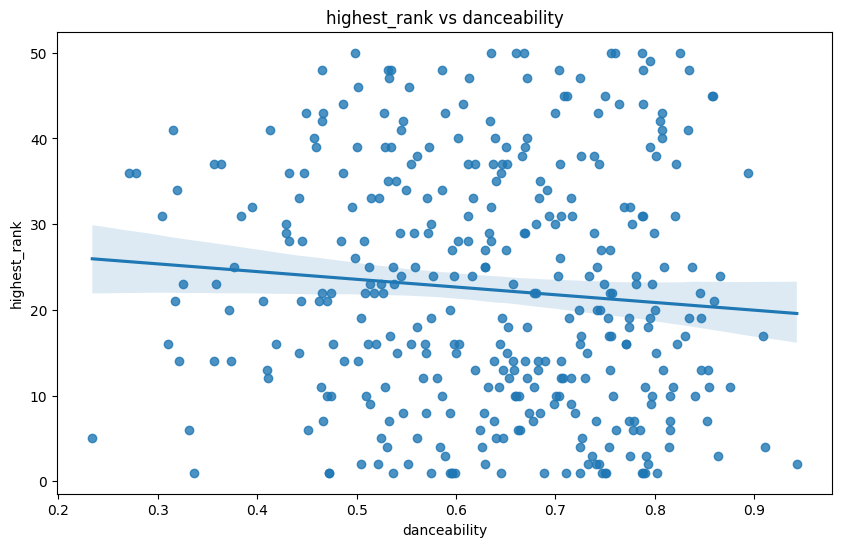

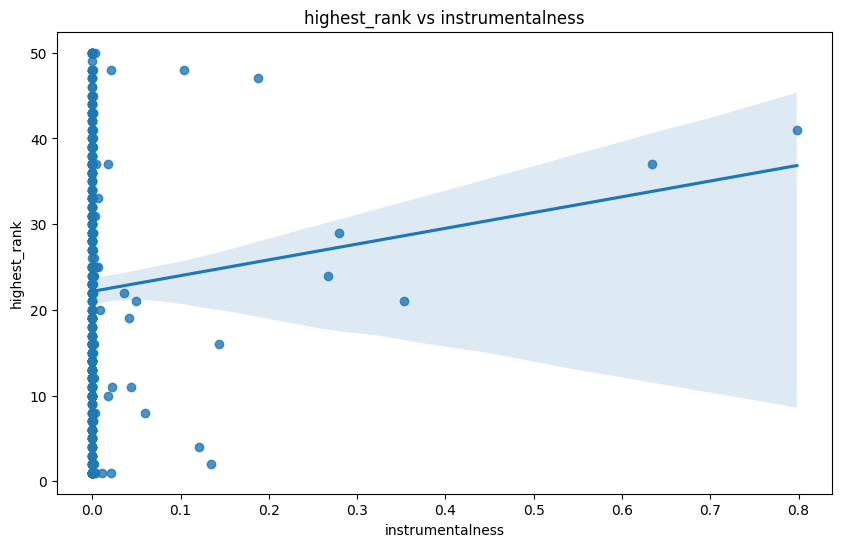

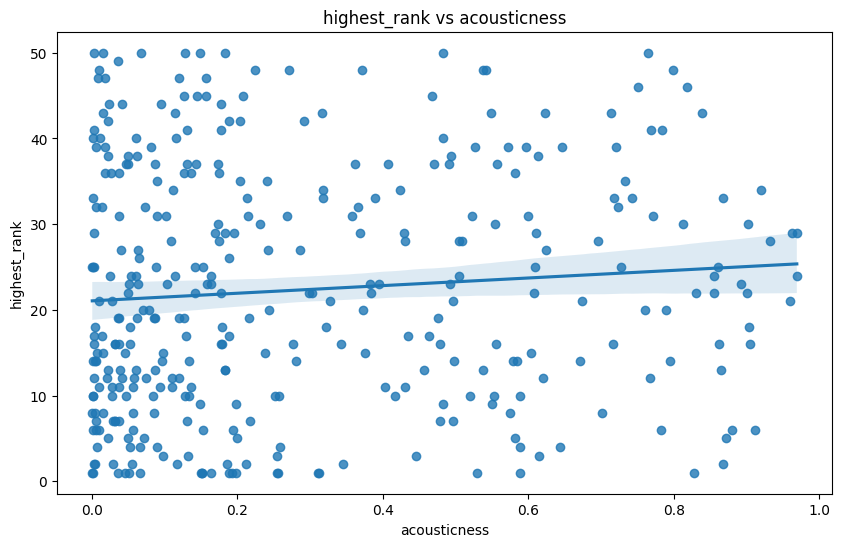

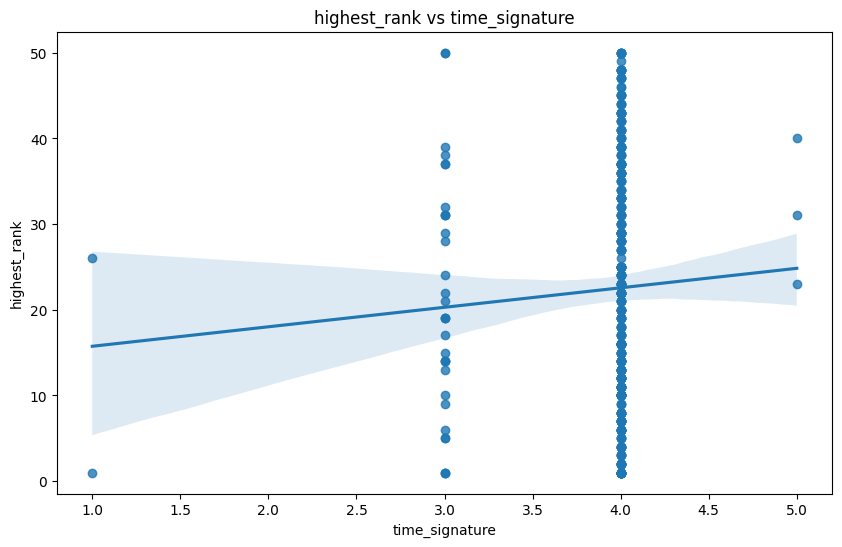

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['danceability', 'instrumentalness', 'acousticness', 'time_signature']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[feature], y=df['highest_rank'], data=df, scatter=True, fit_reg=True)
    plt.xlabel(feature)
    plt.ylabel('highest_rank')
    plt.title(f'highest_rank vs {feature}')
    plt.show()

However, upon examining the plots, it's evident that the data points are scattered widely, resulting in a chaotic visualization. This indicates that the correlations between these features and 'highest_rank' are not strong or linear. 



Only thing that we can get from those plots is that ofcourse most of the popular daily songs are the new songs, released this year or the year ago and this is proven by comparing the `highest rank` with `release_year`.

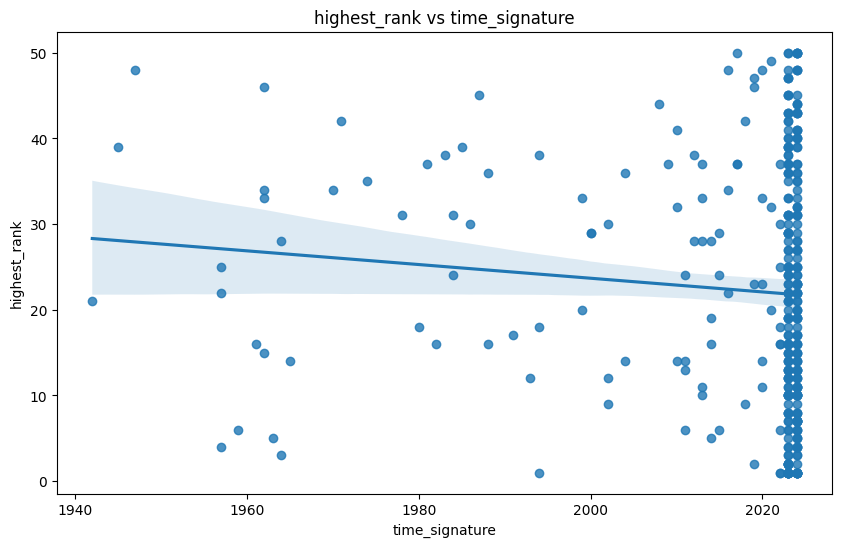

In [57]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['release_year'], y=df['highest_rank'], data=df, scatter=True, fit_reg=True)
plt.xlabel(feature)
plt.ylabel('highest_rank')
plt.title(f'highest_rank vs {feature}')
plt.show()

Upon comparing the 'highest_rank', 'release_year', and 'is_explicit' features, we observe some interesting trends. 

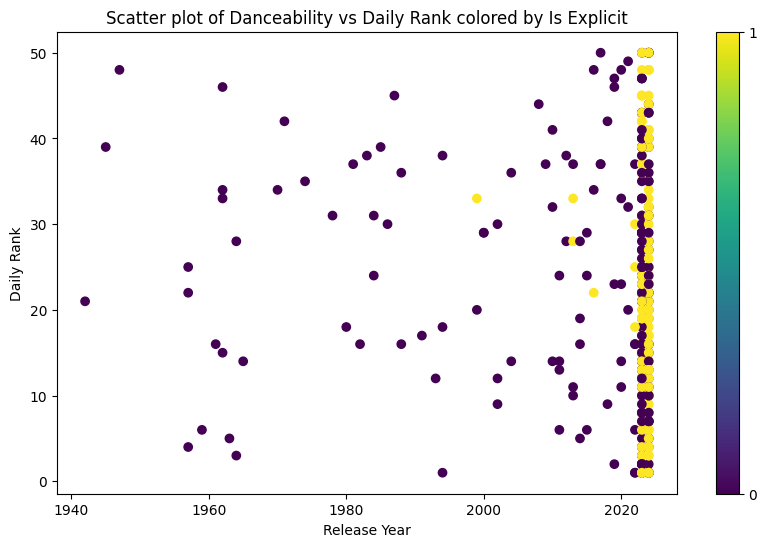

In [58]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['release_year'], df['highest_rank'], c=df['is_explicit'], vmin=0, vmax=1)
plt.xlabel('Release Year')
plt.ylabel('Daily Rank')
plt.title('Scatter plot of Danceability vs Daily Rank colored by Is Explicit')
plt.colorbar(scatter, ticks=[0, 1])
plt.show()


It's noticeable that there are almost no explicit songs before around 2010, with only a few exceptions. This could be due to various factors such as societal norms, regulations, or the music industry's practices during that period.

In contrast, most of the popular songs released in recent years are marked as explicit. This trend suggests a shift in the music industry's approach and audience preferences, with explicit content becoming more common in popular music.

This analysis provides valuable insights into the changing trends in music over the years and could be useful in predicting the popularity or ranking of a song based on its release year and explicit content.

In [59]:
X = df[['danceability', 'mode', 'acousticness', 'is_explicit', 'time_signature']]
y = df['highest_rank']

Unfortunately, the analysis reveals no significant correlation between the `highest rank` and the other features that exhibited high correlation in the map. This lack of correlation might suggest that the success of a song, as measured by its highest rank, cannot be easily predicted by these features. This finding underscores the subjective nature of music as an art form.

# 6. Splitting the Data

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Bulding

In [61]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
                              n_estimators=39, 
                              random_state=42, 
                              max_features="sqrt", 
                              max_depth=5,
                              ccp_alpha=0.7,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              bootstrap=True
                              )


# 8. Model Training

In [62]:
model.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.7, max_depth=5, max_features='sqrt',
                      n_estimators=39, random_state=42)

# 9. Model Evaluation

I am performing cross-validation using a 5-fold cross-validation technique. Cross-validation is a method for evaluating the performance of a machine learning model. It involves splitting the dataset into multiple subsets or folds, training the model on a subset of the data, and evaluating its performance on the remaining fold.

To calculate the mean squared error (MSE) as a validation metric, I am using the `cross_val_score` function from the `sklearn.model_selection` module. This function takes the model, the input features, the target variable, and the number of folds as parameters. It returns an array of scores, one for each fold.

After obtaining the scores, I am calculating the mean squared error by taking the average of the scores. The mean squared error provides a measure of how well the model is performing in terms of the difference between the predicted and actual values. A lower mean squared error indicates better model performance.

In [63]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("RMSE scores for each fold: ", scores)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

RMSE scores for each fold:  [-0.05874288 -0.09635685  0.00249029 -0.02363948  0.01418669]
Mean Squared Error: 180.444478601868
Root Mean Squared Error: 13.432962391143214


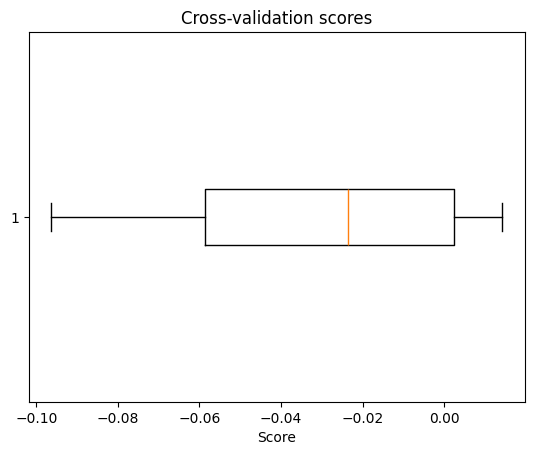

In [64]:
import matplotlib.pyplot as plt

plt.boxplot(scores, vert=False)
plt.title('Cross-validation scores')
plt.xlabel('Score')
plt.show()

### k-Fold cross-validation

In general, it is always better to use k-Fold technique instead of hold-out. In a head to head, comparison k-Fold gives a more stable and trustworthy result since training and testing is performed on several different parts of the dataset. We can make the overall score even more robust if we increase the number of folds to test the model on many different sub-datasets.

Still, k-Fold method has a disadvantage. Increasing k results in training more models and the training process might be really expensive and time-consuming.

MSE scores for each fold:  [180.89073671072026, 239.23502798738042, 221.19730213907533, 190.81122972117328, 169.05634643463156, 269.1402822909478, 151.3459902666805, 194.32338150884476, 183.54442412013827, 209.1194502217417]
Average MSE score:  200.8664171401334
Root of Average MSE score: 14.172734991529806


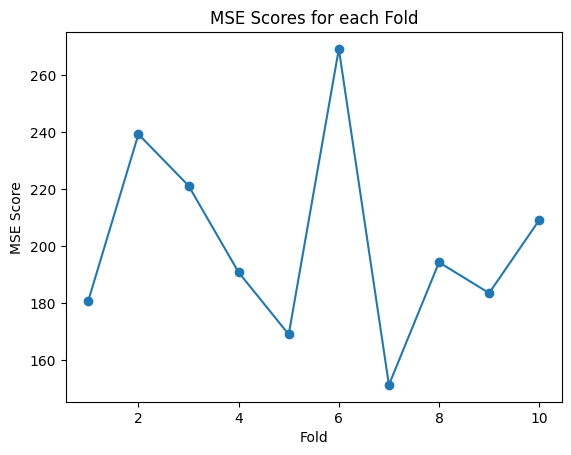

In [65]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=10)

mse_scores_kfold = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores_kfold.append(mse)


# Print each of the scores
print("MSE scores for each fold: ", mse_scores_kfold)

# Print the average score
print("Average MSE score: ", np.mean(mse_scores_kfold))

print(f"Root of Average MSE score: {np.sqrt(np.mean(mse_scores_kfold))}")

# Plot the MSE scores
plt.plot(range(1, 11), mse_scores_kfold, marker='o')
plt.xlabel('Fold')
plt.ylabel('MSE Score')
plt.title('MSE Scores for each Fold')
plt.show()


### LOOCV

The greatest advantage of Leave-one-out cross-validation is that it doesn’t waste much data. We use only one sample from the whole dataset as a test set, whereas the rest is the training set. But when compared with k-Fold CV, LOOCV requires building n models instead of k models, when we know that n which stands for the number of samples in the dataset is much higher than k. It means LOOCV is more computationally expensive than k-Fold, it may take plenty of time to cross-validate the model using LOOCV.

MSE scores for each fold:  [209.25464150283412, 206.58425512667176, 49.489224535848635, 83.84223842648305, 216.4541948959422, 125.56571025285824, 1.4681964323547847, 347.9491936387173, 342.58653653657746, 60.55288235489561, 3.3256724306972414, 205.7839675587182, 115.19131747015804, 194.42867092971363, 10.1095915414149, 278.94833954768154, 2.0571120598848185, 545.2262565685627, 480.67424548971354, 236.2671169492268, 244.34989456906263, 189.41683726373105, 44.30033815095237, 216.79059283355303, 33.81419344990571, 651.0692853154063, 6.816567161504971, 142.02786547070275, 37.150780786451136, 99.24140210949533, 0.004451499789997388, 276.65135005329915, 360.94359793483505, 29.163832771404568, 305.1567627888938, 261.6504863099423, 231.18508373201874, 89.08760263171871, 153.56582900421031, 148.69058253073894, 198.17498997580952, 388.54137645947105, 23.434498722128954, 60.233650446670275, 53.43269100796225, 19.155685039436243, 291.1558426926735, 541.1803152315838, 518.0631262648067, 529.3053101

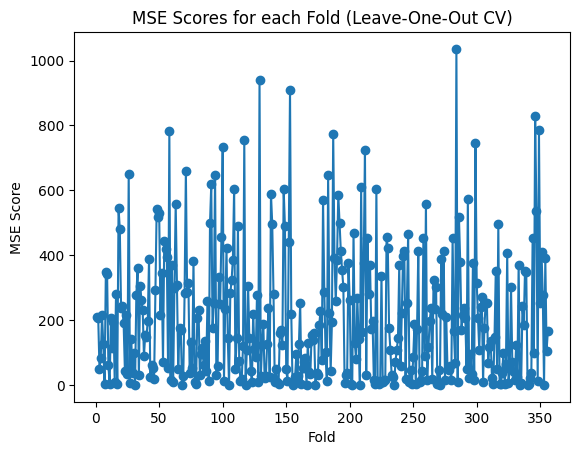

In [66]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

loo = LeaveOneOut()

mse_scores_loocv = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores_loocv.append(mse)

print("MSE scores for each fold: ", mse_scores_loocv)

print("Average MSE score: ", np.mean(mse_scores_loocv))

print("Root of Average MSE score: ", np.sqrt(np.mean(mse_scores_loocv)))


# Plot the MSE scores
plt.plot(range(1, len(mse_scores_loocv) + 1), mse_scores_loocv, marker='o')
plt.xlabel('Fold')
plt.ylabel('MSE Score')
plt.title('MSE Scores for each Fold (Leave-One-Out CV)')
plt.show()


### Nested k-Fold

The inner loop performs cross-validation to identify the best features and model hyper-parameters using the k-1 data folds available at each iteration of the outer loop. The model is trained once for each outer loop step and evaluated on the held-out data fold. This process yields k evaluations of the model performance, one for each data fold, and allows the model to be tested on every sample.

It is to be noted that this technique is computationally expensive because plenty of models are trained and evaluated.

Inner MSE scores:  [196.37898146 129.96798458 225.17126704 246.79174311 268.45853019
 208.26110435 161.83624182 164.68640757 240.19795463 213.88168528]
Mean of inner MSE scores:  205.56319000227387
Inner MSE scores:  [197.75097287 196.71681525 219.04520555 265.96465431 215.17873189
 169.08400334 252.11989304 155.58784339 190.83642673 229.44625769]
Mean of inner MSE scores:  209.17308040344966
Inner MSE scores:  [218.67857437 174.70629581 252.04826535 237.29093624 243.24954211
 213.04079194 129.44298089 183.00402212 164.26111559 240.77028732]
Mean of inner MSE scores:  205.64928117495052
Inner MSE scores:  [191.34145349 208.60118569 250.26959618 190.59411914 299.81292486
 190.86354955 203.35887454 144.5454447  214.66234128 180.99302265]
Mean of inner MSE scores:  207.5042512094943
Inner MSE scores:  [224.07555464 207.61747644 249.65048743 175.94343433 210.56811554
 199.22524506 150.66648808 187.97969409 220.67249841 185.50215406]
Mean of inner MSE scores:  201.19011480847587
Inner MSE s

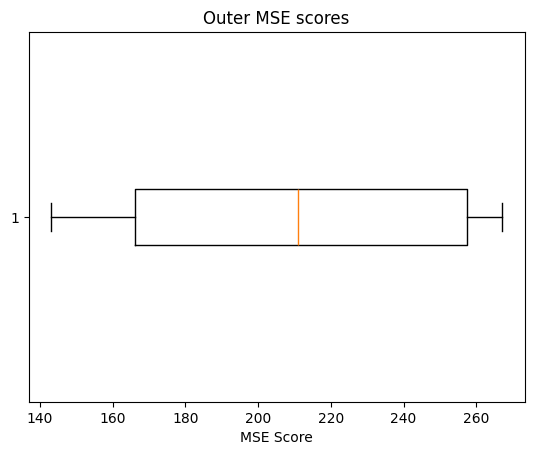

In [67]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
inner_cv = KFold(n_splits=10, shuffle=True, random_state=1)

outer_scores_nested_kfold = []

for train_index, test_index in outer_cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    inner_scores = cross_val_score(model, X_train, y_train, cv=inner_cv, scoring='neg_mean_squared_error')
    inner_scores = -1 * inner_scores
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    outer_scores_nested_kfold.append(mse)
    
    print("Inner MSE scores: ", inner_scores)
    print("Mean of inner MSE scores: ", np.mean(inner_scores))


print("Outer MSE scores: ", outer_scores_nested_kfold)

print("Average outer MSE score: ", np.mean(outer_scores_nested_kfold))
print("Root of average outer MSE score: ", np.sqrt(np.mean(outer_scores_nested_kfold)))

plt.boxplot(outer_scores_nested_kfold, vert=False)
plt.title('Outer MSE scores')
plt.xlabel('MSE Score')
plt.show()



Upon comparing the Mean Squared Error (MSE) scores from the K-Fold and Leave-One-Out Cross Validation (LOOCV) methods, we observe that they are quite similar, both hovering around 200. This suggests that these two methods provide comparable performance when evaluating our model.

In [74]:
import numpy as np
print("K-Fold: Mean = {}, root = {}".format(np.mean(mse_scores_kfold), np.sqrt(np.mean(mse_scores_kfold))))
print("LOOCV: Mean = {}, root = {}".format(np.mean(mse_scores_loocv), np.sqrt(np.mean(mse_scores_loocv))))
print("Nested K-Fold: Mean = {}, root = {}".format(np.mean(outer_scores_nested_kfold), np.sqrt(np.mean(outer_scores_nested_kfold))))

K-Fold: Mean = 200.8664171401334, root = 14.172734991529806
LOOCV: Mean = 203.11311017413988, root = 14.251775684950275
Nested K-Fold: Mean = 209.77720479548367, root = 14.483687541350914


However, when we look at the Nested K-Fold method, which is a more rigorous validation technique with 10 folds, we see a slightly higher mean MSE score, around 209. This could indicate that the Nested K-Fold method, with its additional layer of validation, is providing a more realistic estimate of the model's performance.

It's important to note that while lower MSE scores are generally better, the difference in scores between these methods is relatively small.

# Real Life Example

Here's the intended usage of the model: It takes as input the features of an unreleased song and predicts its potential highest rank upon release.

In [68]:
new_features = pd.DataFrame({
    'danceability': [0.594],
    'mode': [1],
    'acousticness': [0.189],
    'is_explicit': [1],
    'time_signature': [4]
})
predicted_rank = model.predict(new_features)

print(f"Predicted highest rank: {predicted_rank[0]}")

Predicted highest rank: 18.081855969349846


# Conclusion

Unfortunately, the analysis reveals no significant correlation between the `highest rank` and the other features that exhibited high correlation in the map. This lack of correlation might suggest that the success of a song, as measured by its highest rank, cannot be easily predicted by these features. This finding underscores the subjective nature of music as an art form. It reminds us that while certain patterns and trends can be observed, the appeal of a song often transcends quantifiable characteristics, resonating with listeners on a deeply personal and emotional level.

# References

- [Cross-Validation in Machine Learning](https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right)
- [SpotifyAPI](https://developer.spotify.com/documentation/web-api)